# Pandas
Pandas is
- aimed at multivariate data analysis and manipulation.
- a play on the phrase "Python data analysis".
- an open-source project hosted on github at https://github.com/pandas-dev/pandas.
- written in Python and C.

This notebook provides a brief introduction/refresher of most important Pandas functionalities to analyse and prepare data for visualisations. The examples are based on the notebooks accompanying chapters 5-9 in "Python for Data Analysis" retrieved from: https://github.com/wesm/pydata-book

<img src="pics/python_data_analysis.jpg">

## Prerequisities
Always make sure you have

1. activated the correct conda environment (in your terminal/console: e.g. `conda activate vdss`)
2. startet the Jupyter lab server `jupyter lab` 

In [1]:
import pandas as pd
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
data_path = os.path.join(os.getenv('DATA_FOLDER'), 'pandas_exs')

In [4]:
os.listdir(data_path)

['stinkbug.png',
 'my_file.txt',
 'ex1.csv',
 'ex2.csv',
 'example.json',
 'tips.csv',
 'ex5.csv',
 'ex1.xlsx',
 'iris.csv',
 'titanic.csv',
 'CASP.csv']

Define the folder to create any outputs from the current notebook:

In [5]:
work_path = os.path.join(os.getenv('OUTPUT_FOLDER'), '01_setup', '01_3_pandas')
if work_path and not os.path.exists(work_path):
    os.makedirs(work_path)

In [6]:
work_path

'/Users/schiba/Projects/zhaw-bachelor/semester-4/vdss/output/01_setup/01_3_pandas'

## Introduction to Pandas Data Structures

### Series
A Series is a one-dimensional array-like object containing an array of data and an associated index:

In [7]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [8]:
print(obj.values)
print(obj.index)  # like range(4)

[ 4  7 -5  3]
RangeIndex(start=0, stop=4, step=1)


In [9]:
obj.name = 'somevalues'
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj.index.name = 'names'

In [10]:
obj

names
Bob      4
Steve    7
Jeff    -5
Ryan     3
Name: somevalues, dtype: int64

The index is an object:

In [11]:
obj2index = pd.Index(data=['d', 'b', 'a', 'c'], name='index2')
obj2 = pd.Series([4, 7, -5, 3], index=obj2index, name='othervalues')

In [12]:
obj2.index.name

'index2'

In [13]:
'z' in obj2.index

False

In [14]:
'b' in obj2.index

True

Access and assign elements by index:

In [15]:
print(obj2['a'])
obj2['d'] = 6
print(obj2[['c', 'a', 'd']])

-5
index2
c    3
a   -5
d    6
Name: othervalues, dtype: int64


Numpy array operations:

In [16]:
print(obj2[obj2 > 0])
print(obj2 * 2)
print(np.exp(obj2))

index2
d    6
b    7
c    3
Name: othervalues, dtype: int64
index2
d    12
b    14
a   -10
c     6
Name: othervalues, dtype: int64
index2
d     403.428793
b    1096.633158
a       0.006738
c      20.085537
Name: othervalues, dtype: float64


In [17]:
print('b' in obj2)
print('e' in obj2)

True
False


In [18]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [19]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [20]:
pd.isnull(obj4)
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [21]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [22]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [23]:
print(obj4)

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64


In [24]:
print(obj3 + obj4)

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64


### DataFrame
While Series is like a column, the DataFrame is the whole table.

In [25]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [26]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [27]:
frame.tail()

,state,year,pop
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [28]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [29]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
print(frame2.columns)

Index(['year', 'state', 'pop', 'debt'], dtype='object')


In [30]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


Select columns:

In [31]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [32]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

Select rows:

In [33]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [34]:
frame2.iloc[2]

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

Columns can be modified by assignment:

In [35]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [36]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


In [37]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [38]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


Delete a columns:

In [39]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

Creating a Dataframe from a nested dict of dicts. The outer keys are interpreted as the columns and the inner keys as the row indices.

In [40]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [41]:
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


Swap columns and rows by transposing the DataFrame

In [42]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


Providing an explicit index will ignore additional rows in the data:

In [43]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


Passing a Series for the columns works accordingly (in principle, a Series is an ordered dict!)

In [44]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


In [45]:
frame3.index.name = 'year'
frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [46]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

In [47]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

Create A Dataframe from a list of dicts: The dicts are interpreted as rows with the keys as the column names.

In [48]:
data = [{'points': 50, 'time': '5:00', 'year': 2010}, 
{'points': 25, 'time': '6:00', 'month': "february"}, 
{'points':90, 'time': '9:00', 'month': 'january'}, 
{'points_h1':20, 'month': 'june'}]

In [49]:
pd.DataFrame(data)

,points,time,year,month,points_h1
0,50.0,5:00,2010.0,NaN,NaN
1,25.0,6:00,NaN,february,NaN
2,90.0,9:00,NaN,january,NaN
3,NaN,NaN,NaN,june,20.0


## Reading and Writing Data in Text Format

In [50]:
df = pd.read_csv(os.path.join(data_path, 'ex1.csv'))
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [51]:
pd.read_csv(os.path.join(data_path,'ex2.csv'), header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [52]:
pd.read_csv(os.path.join(data_path, 'ex2.csv'), names=['a', 'b', 'c', 'd', 'message'])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [53]:
names = ['a', 'b', 'c', 'd', 'message']
pd.read_csv(os.path.join(data_path, 'ex2.csv'), names=names, index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


### Writing Data to Text Format

In [54]:
data = pd.read_csv(os.path.join(data_path, 'ex5.csv'))
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [55]:
data.to_csv(os.path.join(work_path, 'out.csv'))

### JSON Data

In [56]:
obj = """
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
              {"name": "Katie", "age": 38,
               "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""

In [57]:
import json
result = json.loads(obj)
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [58]:
asjson = json.dumps(result)

In [59]:
siblings = pd.DataFrame(result['siblings'], columns=['name', 'age'])
siblings

,name,age
0,Scott,30
1,Katie,38


In [60]:
data = pd.read_json(os.path.join(data_path,'example.json'))
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [61]:
print(data.to_json())
print(data.to_json(orient='records'))

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}
[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]


In [62]:
data.to_json(os.path.join(work_path, 'from_example.json'))

## Binary/Proprietary Data Formats

In [63]:
frame = pd.read_csv(os.path.join(data_path, 'ex1.csv'))
frame

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [64]:
frame.to_pickle(os.path.join(work_path, 'df_ex1.pkl'))

In [65]:
pd.read_pickle(os.path.join(work_path, 'df_ex1.pkl'))

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### Reading Microsoft Excel Files

In [66]:
pd.read_excel(os.path.join(data_path, 'ex1.xlsx'), 'Sheet1')

,Unnamed: 0,a,b,c,d,message
0,0,1,2,3,4,hello
1,1,5,6,7,8,world
2,2,9,10,11,12,foo


In [67]:
frame.to_excel(os.path.join(work_path, 'ex2_to_excel.xlsx'))

## Data Cleaning and Preparation
### Handling Missing Data

In [68]:
string_data = pd.Series([None, 'artichoke', np.nan, 'avocado'])
print(string_data.isnull())

0     True
1    False
2     True
3    False
dtype: bool


#### Filtering Out Missing Data

In [69]:
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [70]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [71]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [72]:
data.dropna()

,0,1,2
0,1.0,6.5,3.0


In [73]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [74]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [75]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [76]:
df = pd.DataFrame(np.random.randn(7, 3))
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,-0.204708,NaN,NaN
1,-0.555730,NaN,NaN
2,0.092908,NaN,0.769023
3,1.246435,NaN,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [77]:
df.dropna()

,0,1,2
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [78]:
df.dropna(thresh=2)

,0,1,2
2,0.092908,NaN,0.769023
3,1.246435,NaN,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


#### Filling In Missing Data

In [79]:
df.fillna(0)

,0,1,2
0,-0.204708,0.000000,0.000000
1,-0.555730,0.000000,0.000000
2,0.092908,0.000000,0.769023
3,1.246435,0.000000,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [80]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.204708,0.500000,0.000000
1,-0.555730,0.500000,0.000000
2,0.092908,0.500000,0.769023
3,1.246435,0.500000,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [81]:
_ = df.fillna(0, inplace=True)
df

,0,1,2
0,-0.204708,0.000000,0.000000
1,-0.555730,0.000000,0.000000
2,0.092908,0.000000,0.769023
3,1.246435,0.000000,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [82]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,NaN,1.343810
3,-0.713544,NaN,-2.370232
4,-1.860761,NaN,NaN
5,-1.265934,NaN,NaN


Propagate last valid observation forward to next valid backfill:

In [83]:
df.fillna(method='ffill')

/var/folders/g8/ts4wj2w128q2scsf9ttnhwq40000gn/T/ipykernel_51221/253117906.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,0.124121,1.343810
3,-0.713544,0.124121,-2.370232
4,-1.860761,0.124121,-2.370232
5,-1.265934,0.124121,-2.370232


In [84]:
df.fillna(method='ffill', limit=2)

/var/folders/g8/ts4wj2w128q2scsf9ttnhwq40000gn/T/ipykernel_51221/2454611106.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', limit=2)


,0,1,2
0,0.476985,3.248944,-1.021228
1,-0.577087,0.124121,0.302614
2,0.523772,0.124121,1.343810
3,-0.713544,0.124121,-2.370232
4,-1.860761,NaN,-2.370232
5,-1.265934,NaN,-2.370232


### Dropping Entries from an Axis

In [85]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj
new_obj = obj.drop('c')
new_obj
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [86]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [87]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [88]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [89]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [90]:
obj.drop('c', inplace=True)
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

### Indexing, Selection, and Filtering

In [91]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [92]:
obj['b']

np.float64(1.0)

In [93]:
obj[1]

/var/folders/g8/ts4wj2w128q2scsf9ttnhwq40000gn/T/ipykernel_51221/3621043455.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj[1]


np.float64(1.0)

In [94]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [95]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [96]:
obj[[1, 3]]

/var/folders/g8/ts4wj2w128q2scsf9ttnhwq40000gn/T/ipykernel_51221/4102577471.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj[[1, 3]]


b    1.0
d    3.0
dtype: float64

In [97]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

In [98]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [99]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [100]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


To access a single or multiple columns from DataFrame by name we can use dictionary like notation on DataFrame:

In [101]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [102]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


Selecting rows by slicing or a boolean array:

In [103]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [104]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Indexing with a boolean DataFrame:

In [105]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [106]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


#### Selection with loc and iloc
Select Columns & Rows by index labels or positions
```python
dataFrame.loc[<ROWS RANGE> , <COLUMNS RANGE>]
dataFrame.iloc[<ROWS INDEX RANGE> , <COLUMNS INDEX RANGE>]
```

In [107]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

In [108]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int64

In [109]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

In [110]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [111]:
data.loc[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int64

In [112]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


### Arithmetic Methods

In [113]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])
print(s1)
print(s2)

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64
a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64


If any index pairs are not the same when adding together objects, the resulting index will be the union of the index pairs

In [114]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [115]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [116]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [117]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [118]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})
df1

,A
0,1
1,2


In [119]:
df2

,B
0,3
1,4


In [120]:
df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


#### Arithmetic methods with fill values

In [121]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))
df2.loc[1, 'b'] = np.nan
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [122]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [123]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [124]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [125]:
1 / df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [126]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [127]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


### Function Application and Mapping
The element-wise array methods from numpy work as well on pandas objects:

In [128]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.332883,-2.359419,-0.199543
Ohio,-1.541996,-0.970736,-1.307030
Texas,0.286350,0.377984,-0.753887
Oregon,0.331286,1.349742,0.069877


In [129]:
np.abs(frame)

,b,d,e
Utah,0.332883,2.359419,0.199543
Ohio,1.541996,0.970736,1.307030
Texas,0.286350,0.377984,0.753887
Oregon,0.331286,1.349742,0.069877


Apply a function on 1D arrays to each row or column:

In [130]:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    1.874878
d    3.709161
e    1.376907
dtype: float64

In [131]:
frame.apply(f, axis='columns')

Utah      2.692302
Ohio      0.571260
Texas     1.131871
Oregon    1.279866
dtype: float64

In [132]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,d,e
min,-1.541996,-2.359419,-1.307030
max,0.332883,1.349742,0.069877


In [133]:
frame

,b,d,e
Utah,0.332883,-2.359419,-0.199543
Ohio,-1.541996,-0.970736,-1.307030
Texas,0.286350,0.377984,-0.753887
Oregon,0.331286,1.349742,0.069877


In [134]:
format = lambda x: '{:.2f}'.format(x)
frame.applymap(format)

/var/folders/g8/ts4wj2w128q2scsf9ttnhwq40000gn/T/ipykernel_51221/3083276405.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  frame.applymap(format)


,b,d,e
Utah,0.33,-2.36,-0.20
Ohio,-1.54,-0.97,-1.31
Texas,0.29,0.38,-0.75
Oregon,0.33,1.35,0.07


In [135]:
frame['e'].map(format)

Utah      -0.20
Ohio      -1.31
Texas     -0.75
Oregon     0.07
Name: e, dtype: object

## Summarizing and Computing Descriptive Statistics

In [136]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


Some basic information about the data contained in the DataFrame:

In [137]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   one     3 non-null      float64
 1   two     2 non-null      float64
dtypes: float64(2)
memory usage: 96.0+ bytes
None


In [138]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [139]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [140]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [141]:
df.idxmax()

one    b
two    d
dtype: object

In [142]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [143]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [144]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

### Sorting

In [145]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [146]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [147]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [148]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [149]:
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [150]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [151]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [152]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


# Combining and Merging Datasets
## Concatenate
`pandas.concat` appends one (or more) dataframes one below the other (or sideways, depending on whether the axis option is set to 0 or 1)
```python
pd.concat(objs, axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)
```

In [153]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 0, 1])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[0, 1, 2, 3])

In [154]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [155]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
0,A6,B6,C6,D6
1,A7,B7,C7,D7


In [156]:
df3

,A,B,C,D
0,A8,B8,C8,D8
1,A9,B9,C9,D9
2,A10,B10,C10,D10
3,A11,B11,C11,D11


In [157]:
pd.concat([df1, df2, df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
0,A6,B6,C6,D6
1,A7,B7,C7,D7
0,A8,B8,C8,D8
1,A9,B9,C9,D9


Construct hierarchical index using the passed keys as the outermost level:

In [158]:
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])

In [159]:
result

A    B    C    D
x 0   A0   B0   C0   D0
  1   A1   B1   C1   D1
  2   A2   B2   C2   D2
  3   A3   B3   C3   D3
y 4   A4   B4   C4   D4
  5   A5   B5   C5   D5
  0   A6   B6   C6   D6
  1   A7   B7   C7   D7
z 0   A8   B8   C8   D8
  1   A9   B9   C9   D9
  2  A10  B10  C10  D10
  3  A11  B11  C11  D11

In [160]:
result.loc['y', 4]

A    A4
B    B4
C    C4
D    D4
Name: (y, 4), dtype: object

In [161]:
pd.concat([df1, df3], axis=1)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A8,B8,C8,D8
1,A1,B1,C1,D1,A9,B9,C9,D9
2,A2,B2,C2,D2,A10,B10,C10,D10
3,A3,B3,C3,D3,A11,B11,C11,D11


In [162]:
pd.concat([df1, df2], axis=1, join='inner')

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A6,B6,C6,D6
1,A1,B1,C1,D1,A7,B7,C7,D7


## Merge
`merge()` is used to join two (or more) dataframes on the basis of values of common columns (indices can also be used with `left_index`=True and/or `right_index`=True)
```python
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
```

In [163]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [164]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [165]:
pd.merge(df1, df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,b,6,1


In [166]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,a,2,0
3,a,4,0
4,a,5,0
5,b,6,1


In [167]:
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],
                    'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,a,2,a,0
3,a,4,a,0
4,a,5,a,0
5,b,6,b,1


In [168]:
pd.merge(df1, df2, how='outer')

,key,data1,data2
0,a,2.0,0.0
1,a,4.0,0.0
2,a,5.0,0.0
3,b,0.0,1.0
4,b,1.0,1.0
5,b,6.0,1.0
6,c,3.0,NaN
7,d,NaN,2.0


In [169]:
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                    'data1': range(6)})
df2 = pd.DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                    'data2': range(5)})
df1
df2
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [170]:
pd.merge(df1, df2, how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,a,2,0
5,a,2,2
6,a,4,0
7,a,4,2
8,b,5,1
9,b,5,3


In [171]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],
                     'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6, 7]})
pd.merge(left, right, on=['key1', 'key2'], how='outer')

,key1,key2,lval,rval
0,bar,one,3.0,6.0
1,bar,two,NaN,7.0
2,foo,one,1.0,4.0
3,foo,one,1.0,5.0
4,foo,two,2.0,NaN


In [172]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [173]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


## Join
`Join` is a convenience method to merge on the basis of the index (instead of using `merge()` with the option `left_index`=True)
```python
DataFrame.join(self, other, on=None, how='left', lsuffix='', rsuffix='', sort=False)
```

In [174]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                    index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])

In [175]:
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [176]:
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [177]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [178]:
left.join(right, how='inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [179]:
left.join(right, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [180]:
pd.merge(left, right, left_index=True, right_index=True, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


This does not work with `merge`:

In [182]:
pd.merge(left, right)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

## Group-By

In [183]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.246674,-1.549106
1,a,two,-0.011862,0.022185
2,b,one,1.004812,0.758363
3,b,two,1.327195,-0.660524
4,a,one,-0.919262,0.862580


In [184]:
df.groupby('key1').sum()

,key2,data1,data2
key1,,,
a,onetwoone,-0.684449,-0.664342
b,onetwo,2.332006,0.097839


Once the GroupBy object has been created, several methods are available to perform a computation on the grouped data. 

| Function | Description |
| ------------- | -----:|
|mean()	|Compute mean of groups|
|sum()	|Compute sum of group values|
|size()	|Compute group sizes|
|count()|	Compute count of group|
|std()|	Standard deviation of groups|
|var()|	Compute variance of groups|
sem()|	Standard error of the mean of groups|
|describe()|	Generates descriptive statistics|
|first()|	Compute first of group values|
|last()|	Compute last of group values|
|nth()|	Take nth value, or a subset if n is a list|
|min()|	Compute min of group values|
|max()|	Compute max of group values|

In [185]:
grouped = df.groupby('key2')

In [186]:
grouped

In [187]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key2                                                                     
one    3.0  0.110741  0.969212 -0.919262 -0.336294  0.246674  0.625743   
two    2.0  0.657667  0.946856 -0.011862  0.322902  0.657667  0.992431   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key2                                                                     
one   1.004812   3.0  0.023946  1.363299 -1.549106 -0.395372  0.758363   
two   1.327195   2.0 -0.319170  0.482748 -0.660524 -0.489847 -0.319170   

                          
           75%       max  
key2                      
one   0.810472  0.862580  
two  -0.148493  0.022185

In [188]:
df.groupby('key2')['data1'].apply(list).to_dict()

{'one': [0.246674109982228, 1.0048115907870796, -0.9192615577450495],
 'two': [-0.011861601071082153, 1.3271946137856343]}

## Plotting with Matplotlib
Pandas has a direct interface to matplotlib

### Line Plots

<Axes: >

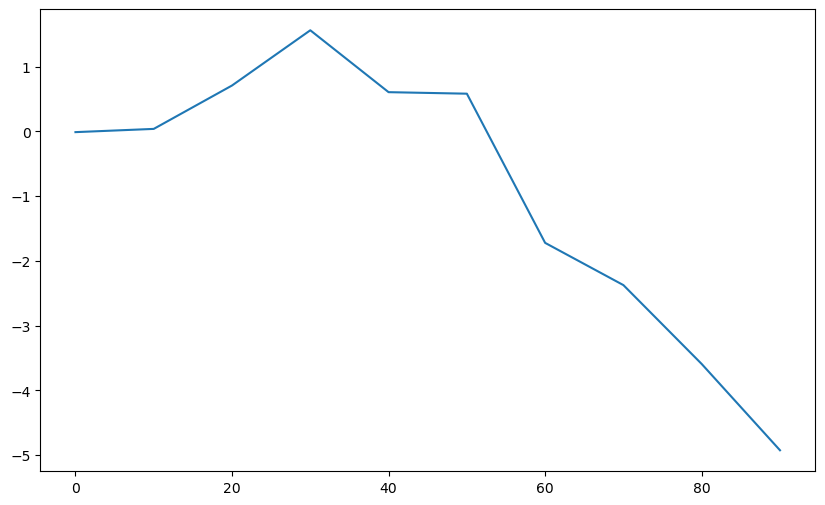

In [189]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<Axes: >

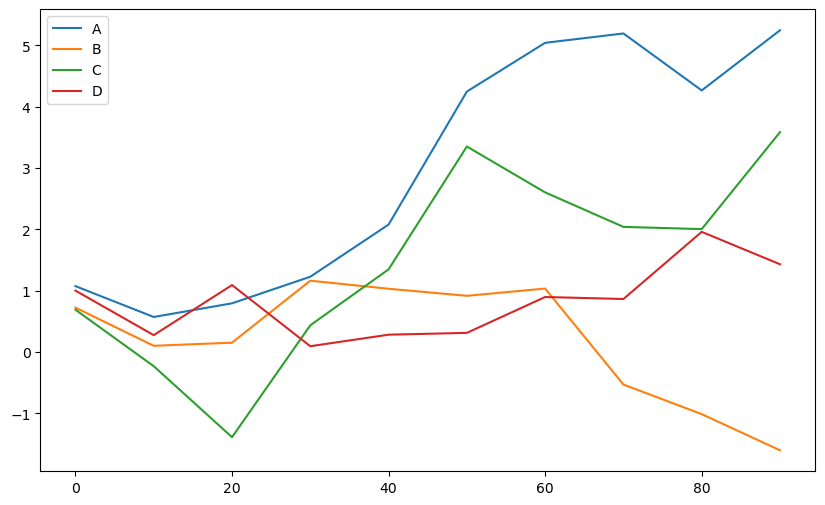

In [190]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### Bar Plots

<Axes: >

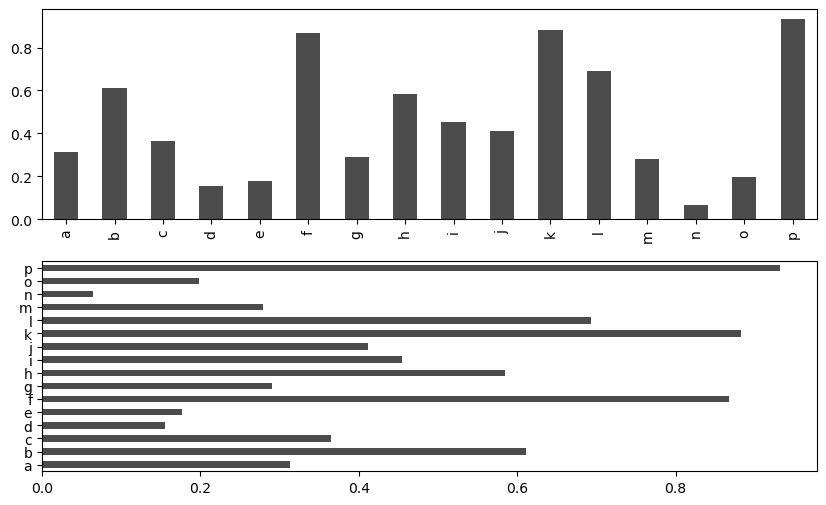

In [191]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [192]:
np.random.seed(12348)

<Axes: >

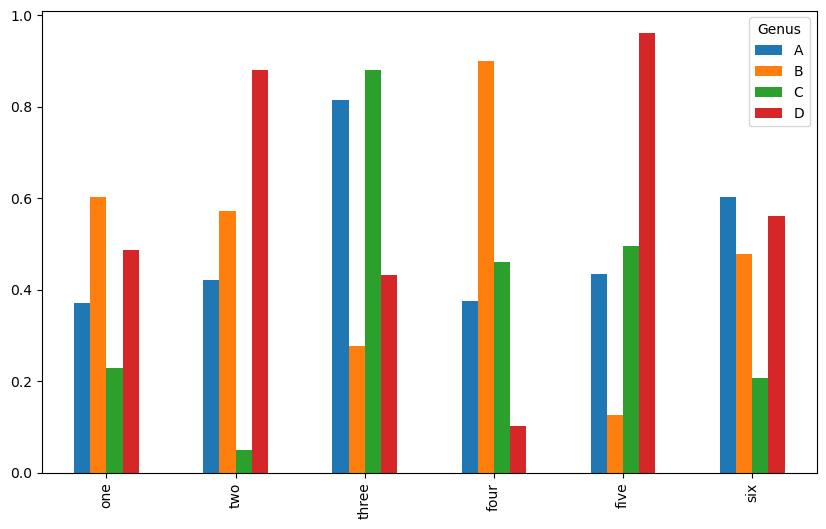

In [193]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar()

In [194]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: >

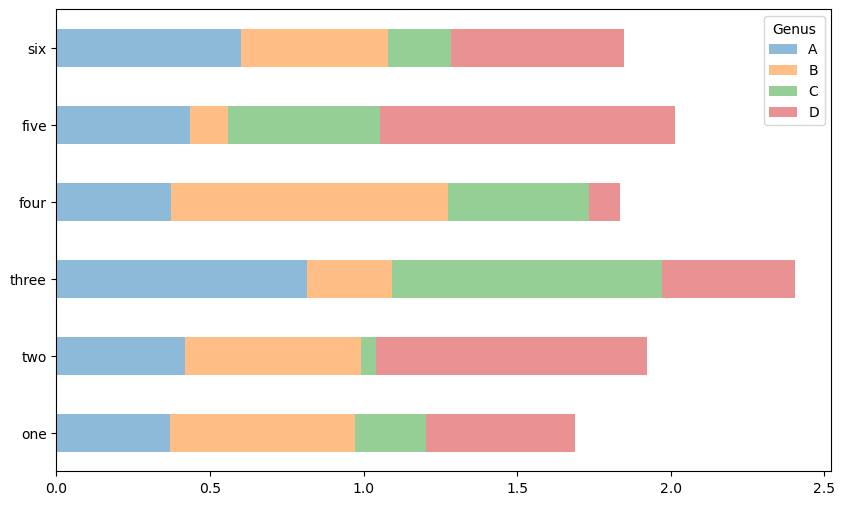

In [195]:
df.plot.barh(stacked=True, alpha=0.5)

In [196]:
plt.close('all')

### Histograms and Density Plots

In [197]:
tips = pd.read_csv(os.path.join(data_path, 'tips.csv'))
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [198]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [199]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='Frequency'>

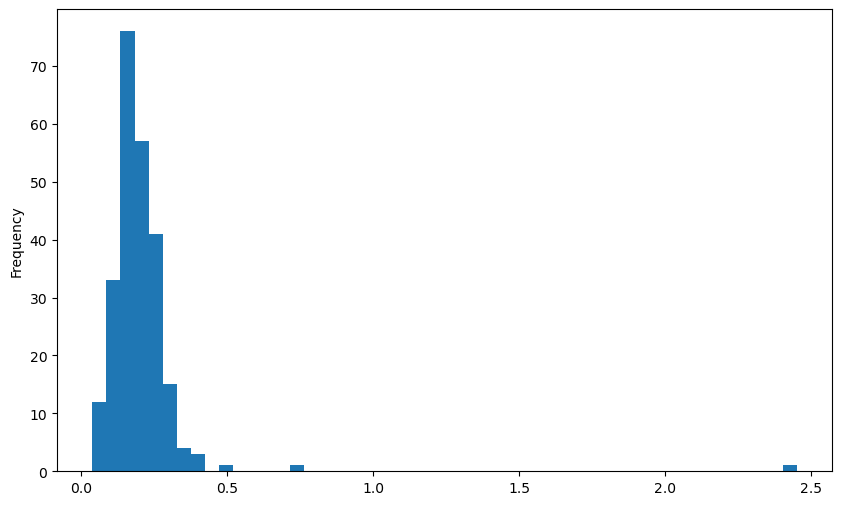

In [200]:
tips['tip_pct'].plot.hist(bins=50)

In [201]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: ylabel='Density'>

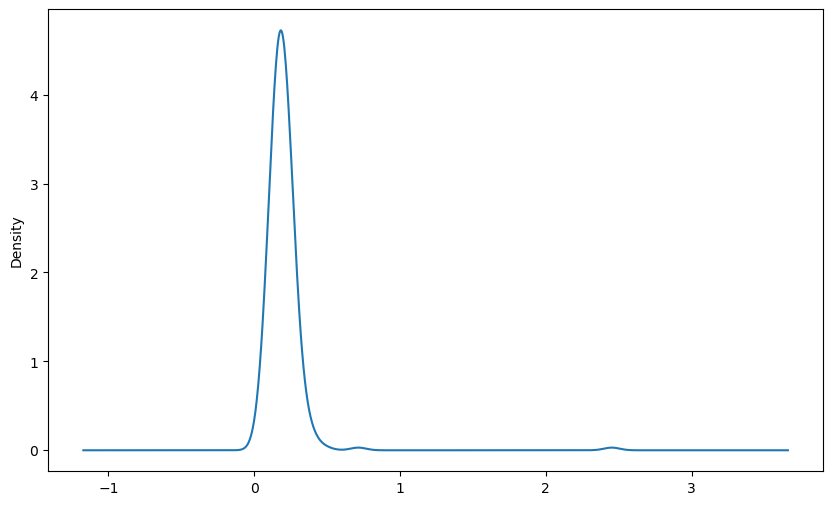

In [202]:
tips['tip_pct'].plot.density()

In [203]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

### Scatter or Point Plots

<Axes: xlabel='total_bill', ylabel='tip'>

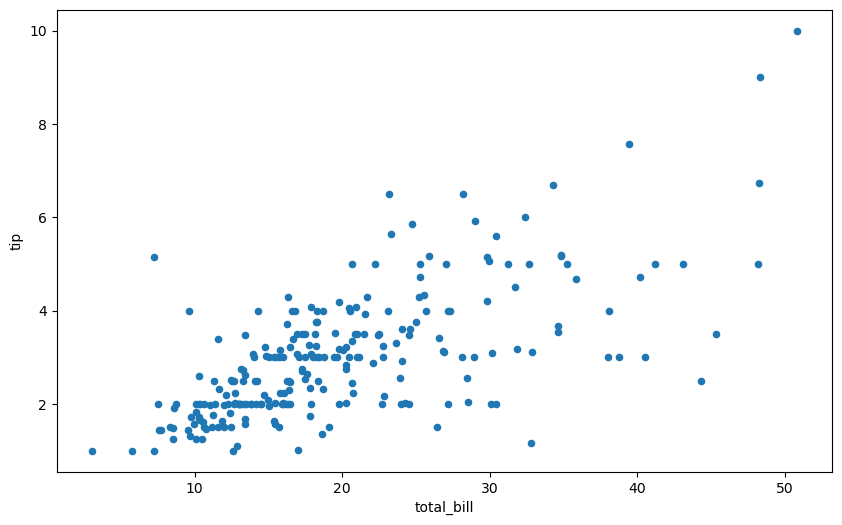

In [204]:
tips.plot.scatter(x='total_bill', y='tip')